In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.pyplot import figure
import matplotlib.ticker as ticker
import seaborn as sns
import statistics
import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import os

# Directory where your parquet files are stored
directory_path = '/content/drive/MyDrive/yellow_taxi_dataset'

# List all parquet files in the directory
parquet_files = [f for f in os.listdir(directory_path) if f.endswith('.parquet')]

# Read each parquet file into a DataFrame and concatenate them into a single DataFrame
df_list = [pd.read_parquet(os.path.join(directory_path, file)) for file in parquet_files]
full_df = pd.concat(df_list, ignore_index=True)


In [ ]:
full_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,NaN
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,NaN
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,NaN
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,NaN
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,NaN


In [ ]:
full_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee'],
      dtype='object')

In [ ]:
full_df.isnull().sum()

VendorID                        0
tpep_pickup_datetime            0
tpep_dropoff_datetime           0
passenger_count           1309356
trip_distance                   0
RatecodeID                1309356
store_and_fwd_flag        1309356
PULocationID                    0
DOLocationID                    0
payment_type                    0
fare_amount                     0
extra                           0
mta_tax                         0
tip_amount                      0
tolls_amount                    0
improvement_surcharge           0
total_amount                    0
congestion_surcharge      1309356
airport_fee              35315203
Airport_fee               4304379
dtype: int64

DATA CLEANING

In [ ]:
# Drop 'Airport_fee' column if it is not necessary
full_df.drop(['Airport_fee','RatecodeID', 'congestion_surcharge', 'VendorID', 'store_and_fwd_flag'], axis=1, inplace=True)


In [ ]:
# Drop rows where latitude or longitude data is missing
full_df.dropna(subset=['passenger_count'], inplace=True)


In [ ]:
median_airport_fee_count = full_df['airport_fee'].median()
full_df['airport_fee'].fillna(median_airport_fee_count, inplace=True)

In [ ]:
full_df.isnull().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
airport_fee              0
dtype: int64

In [ ]:
full_df.duplicated().sum()

0

In [ ]:
full_df.drop_duplicates(inplace=True)
full_df.reset_index(drop=True, inplace=True)

In [ ]:

full_df.drop(['airport_fee','extra', 'mta_tax','tip_amount', 'tolls_amount','improvement_surcharge','payment_type'], axis=1, inplace=True)


In [ ]:

full_df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,total_amount
count,37000868.00000,37000868.00000,37000868.00000,37000868.00000,37000868.00000,37000868.00000,37000868.00000,37000868.00000
mean,.5f,.5f,1.37043,3.57996,165.32897,164.22303,19.42136,28.41827
min,.5f,.5f,0.00000,0.00000,1.00000,1.00000,-1087.30000,-1094.05000
25%,.5f,.5f,1.00000,1.05000,132.00000,114.00000,9.30000,15.80000
50%,.5f,.5f,1.00000,1.78000,162.00000,162.00000,13.50000,21.00000
75%,.5f,.5f,1.00000,3.38000,234.00000,234.00000,21.90000,30.60000
max,.5f,.5f,9.00000,161726.10000,265.00000,265.00000,386983.63000,386987.63000
std,nan,nan,0.89259,70.79758,63.67309,69.78933,76.99984,78.40317




*   The passenger count ranges from 0 (possibly indicating a recorded trip with no passengers or an error) to 9
*   The maximum trip distance is unusually high at 62,359 miles, which is likely an error or outlier and should be investigated or removed for more accurate analysis.
*   The minimum fare amount is $900, and the maximum fare is $1,160.10, both of which are likely errors or outliers






DATA PREPROCESSING

In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd

# Load the NYC shapefile
shapefile_path = '/content/drive/MyDrive/taxi_zones/taxi_zones.shp'
gdf = gpd.read_file(shapefile_path)

# Calculate centroids in the original projected CRS
gdf['centroid'] = gdf.geometry.centroid

# Convert just the centroids to geographic CRS (WGS84, epsg:4326)
centroids_geo = gdf['centroid'].to_crs(epsg=4326)

# Extract longitude and latitude from the converted centroids
gdf['latitude'] = centroids_geo.y
gdf['longitude'] = centroids_geo.x

# Create a simplified DataFrame with just LocationID, latitude, and longitude
location_coords = gdf[['LocationID', 'latitude', 'longitude']]

# Merging coordinates with your full_data DataFrame as done previously
# (Assuming 'full_data' is loaded and contains 'PULocationID' and 'DOLocationID')
full_df = full_df.merge(location_coords, left_on='PULocationID', right_on='LocationID', how='left')
full_df.rename(columns={'latitude': 'pickup_latitude', 'longitude': 'pickup_longitude'}, inplace=True)
full_df.drop('LocationID', axis=1, inplace=True)

full_df = full_df.merge(location_coords, left_on='DOLocationID', right_on='LocationID', how='left')
full_df.rename(columns={'latitude': 'dropoff_latitude', 'longitude': 'dropoff_longitude'}, inplace=True)
full_df.drop('LocationID', axis=1, inplace=True)

# Print the first few rows to verify the coordinates
print(full_df.head())


  tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0           0.97   
1  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0           1.10   
2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0           2.51   
3  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0           1.90   
4  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0           1.43   

   PULocationID  DOLocationID  fare_amount  total_amount  pickup_latitude  \
0           161           141          9.3         14.30        40.758028   
1            43           237          7.9         16.90        40.782477   
2            48           238         14.9         34.90        40.762253   
3           138             7         12.1         20.85        40.774376   
4           107            79         11.4         19.68        40.736824   

   pickup_longitude  dropoff_latitude  dropoff_longitude

In [ ]:
# Drop rows where latitude or longitude data is missing
full_df.dropna(subset=['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'], inplace=True)

In [ ]:
full_df.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
PULocationID                      int64
DOLocationID                      int64
fare_amount                     float64
total_amount                    float64
pickup_latitude                 float64
pickup_longitude                float64
dropoff_latitude                float64
dropoff_longitude               float64
dtype: object

Passenger count

In [ ]:
import statistics

print("Mean Passenger Count: ", statistics.mean(full_df['passenger_count']))
print("Median Passenger Count: ", statistics.median(full_df['passenger_count']))

Mean Passenger Count:  1.370261165731188
Median Passenger Count:  1.0


In [ ]:
pd.crosstab(index = full_df['passenger_count'], columns = 'count')

col_0,count
passenger_count,
0.0,569663
1.0,27382732
2.0,5511322
3.0,1369416
4.0,771076
5.0,477904
6.0,313782
7.0,59
8.0,170


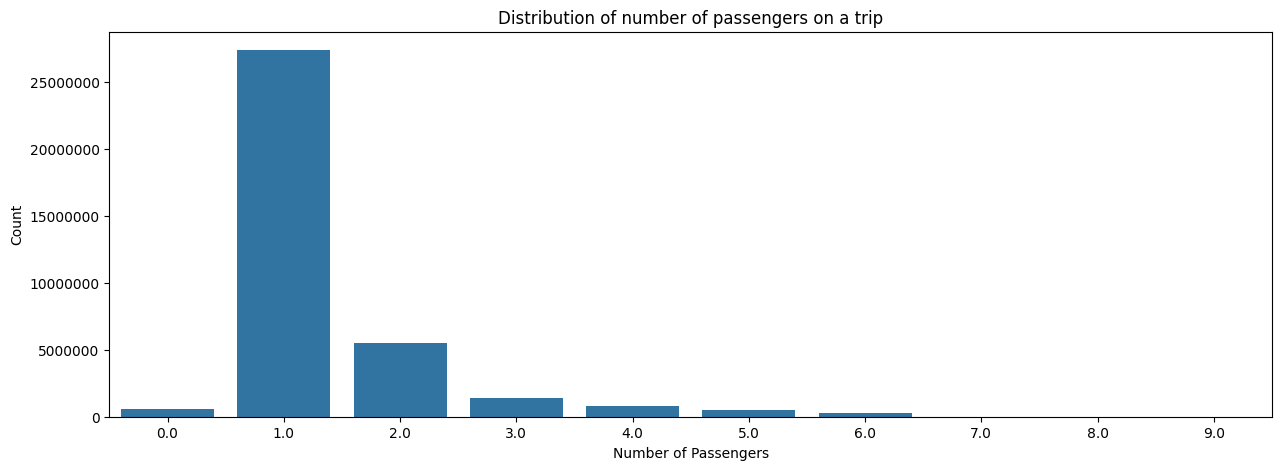

In [ ]:
# Distribution of number of passengers on a trip

f = plt.figure(figsize = (15,5))
sns.countplot(x = 'passenger_count', data = full_df)
plt.title('Distribution of number of passengers on a trip')
plt.xlabel('Number of Passengers')
plt.ylabel('Count')
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.show()

The majority of trips had only one passenger, while trips with more than six passengers were rare occurrences. So we decide to discard observations outside the range from 1 to 6.

In [ ]:
full_df = full_df[(full_df['passenger_count'] > 0) & (full_df['passenger_count'] <= 6)]

num_cleaned_entries = full_df.shape[0]
print("Number of entries after removing outliers: ", num_cleaned_entries)

Number of entries after removing outliers:  35826232


In [ ]:
pd.crosstab(index = full_df['passenger_count'], columns = 'count')

col_0,count
passenger_count,
1.0,27382732
2.0,5511322
3.0,1369416
4.0,771076
5.0,477904
6.0,313782


Now, we have only the entries where the passenger count is between 1 and 6(inclusive)

Trip distance

In [ ]:
# Basic statistics

print(full_df['trip_distance'].mean())
print(full_df['trip_distance'].median())
print(full_df['trip_distance'].kurt()) # The higher the kurtosis is often linked to the greater extremity or deviations in the data.

3.5029703578651534
1.78
3143176.3780091987


In [ ]:
full_df['trip_distance'].value_counts().sort_index()

trip_distance
0.00         402217
0.01          30134
0.02          20090
0.03          15685
0.04          11757
              ...  
62359.52          1
74674.30          1
92311.20          1
118629.80         1
161726.10         1
Name: count, Length: 4935, dtype: int64

<Figure size 400x400 with 0 Axes>

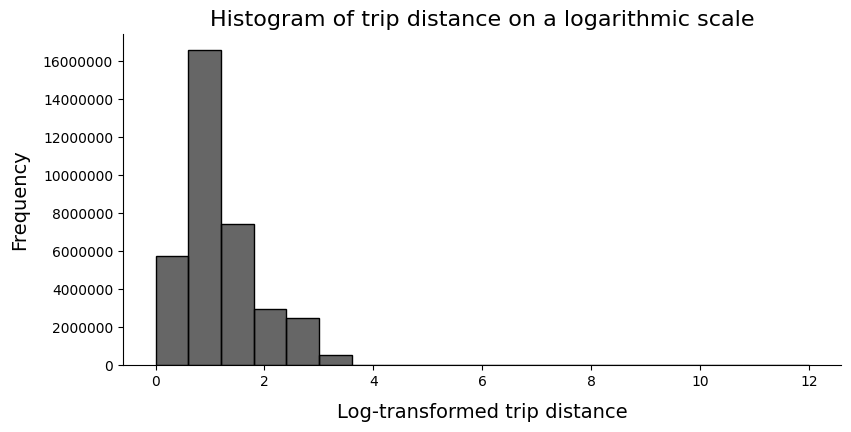

In [ ]:
# Histogram of log-transformed trip distance

plt.figure(figsize = (4,4))
sns.displot(np.log(full_df['trip_distance'].values+1), bins = 20, aspect = 2, height = 4, color= "black", alpha = 0.6)

plt.title("Histogram of trip distance on a logarithmic scale", fontsize = 16)
plt.xlabel("Log-transformed trip distance", fontsize = 14, labelpad = 10)
plt.ylabel("Frequency", fontsize = 14, labelpad = 10)

plt.ticklabel_format(style='plain', axis='y')
plt.savefig('Histogram_trip_distance_log.png', dpi = 300, bbox_inches = 'tight')
plt.show()

The 'Trip_distance' attribute exhibits right-skewness. The plots highlight that the majority of trips were relatively short distances. Therefore, further investigation is conducted using percentile values to determine an appropriate upper bound for outlier removal.

In [ ]:
# 'Trip_distance' percentiles to find an appropriate value for outlier removal

for i in range (0,100,10):
    val = full_df['trip_distance'].values
    val = np.sort(val, axis = None)
    print("{} percentile value is {}".format(i, val[int(len(val)*(float(i)/100))]))
print("100 percentile value is ", val[-1])

0 percentile value is 0.0
10 percentile value is 0.67
20 percentile value is 0.92
30 percentile value is 1.19
40 percentile value is 1.45
50 percentile value is 1.78
60 percentile value is 2.2
70 percentile value is 2.84
80 percentile value is 4.17
90 percentile value is 9.04
100 percentile value is  161726.1


As the 90th percentile value does not seem to be an outlier, further investigation is conducted on the high-end range of data (90th to 100th percentile).

In [ ]:
# 90th to 100th percentile of data

for i in range(90,100):
    val = full_df["trip_distance"].values
    val = np.sort(val,axis = None)
    print("{} percentile value is {}".format(i,val[int(len(val)*(float(i)/100))]))
print ("100 percentile value is ",val[-1])

90 percentile value is 9.04
91 percentile value is 9.67
92 percentile value is 10.35
93 percentile value is 11.17
94 percentile value is 12.36
95 percentile value is 15.09
96 percentile value is 16.94
97 percentile value is 17.74
98 percentile value is 18.51
99 percentile value is 19.94
100 percentile value is  161726.1


In [ ]:
# Closer look at the 99th to 100th percentile

for i in np.arange(0.0, 1.0, 0.1):
    val = full_df["trip_distance"].values
    val = np.sort(val,axis = None)
    print("{} percentile value is {}".format(99+i,val[int(len(val)*(float(99+i)/100))]))
print("100 percentile value is ",val[-1])

99.0 percentile value is 19.94
99.1 percentile value is 20.17
99.2 percentile value is 20.4
99.3 percentile value is 20.67
99.4 percentile value is 20.94
99.5 percentile value is 21.28
99.6 percentile value is 21.7
99.7 percentile value is 22.37
99.8 percentile value is 23.98
99.9 percentile value is 27.08
100 percentile value is  161726.1


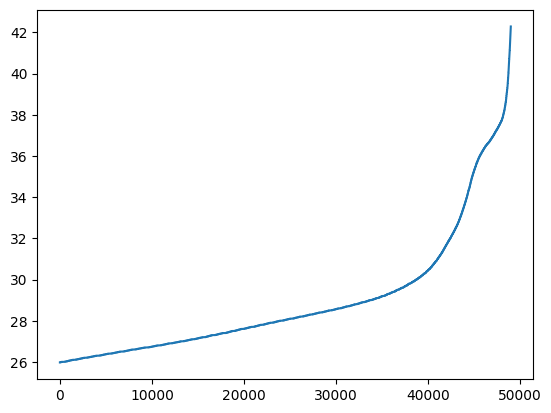

In [ ]:
# Exploring a broader range of observations: Plot of the last 50,000 values (excluding the last 1000 data points)

plt.plot(val[-50000:-1000])
plt.show()

All trip records with trip distance <= 0 and trip distance > 30 miles will be removed in the outlier removal process.

In [ ]:
full_df = full_df[(full_df['trip_distance'] > 0) & (full_df['trip_distance'] <= 30)]

# Print the number of cleaned entries
num_cleaned_entries = full_df.shape[0]
print("Number of entries after removing outliers: ", num_cleaned_entries)

Number of entries after removing outliers:  35412815


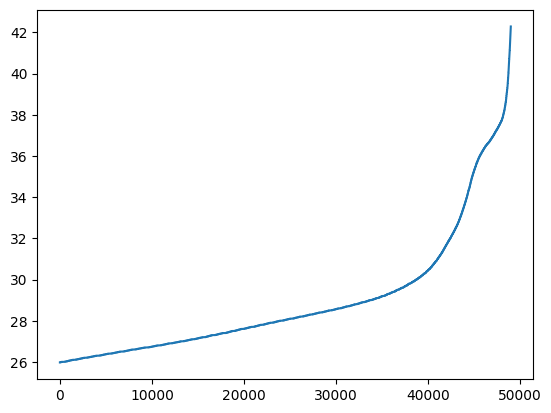

In [ ]:
# Exploring a broader range of observations: Plot of the last 50,000 values (excluding the last 1000 data points)

plt.plot(val[-50000:-1000])
plt.show()

Total amount

In [ ]:
# Payment amount values and frequencies

full_df['total_amount'].value_counts().sort_index()

total_amount
-801.00       1
-769.60       1
-757.55       1
-702.75       1
-701.00       1
             ..
 1026.50      1
 2372.79      1
 143167.45    1
 187513.90    1
 386987.63    1
Name: count, Length: 22796, dtype: int64

<Figure size 200x400 with 0 Axes>

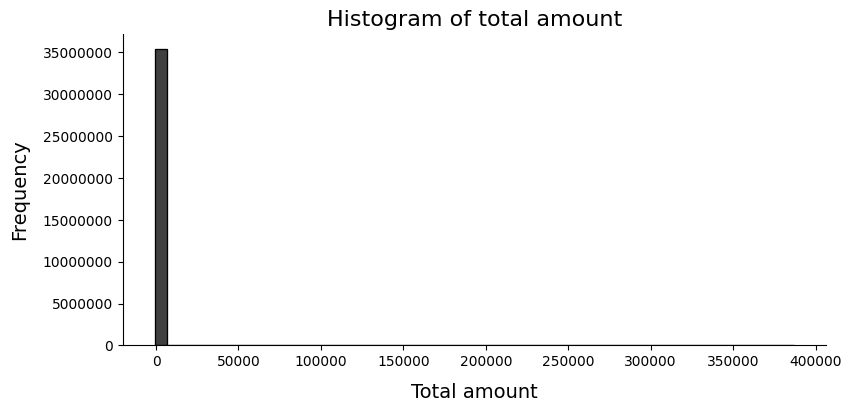

In [ ]:
# Histogram of payment amount

plt.figure(figsize = (2,4))
sns.displot(full_df['total_amount'], bins = 50, aspect = 2, height = 4, color = "black")

plt.title('Histogram of total amount', fontsize= 16)
plt.xlabel('Total amount', fontsize = 14, labelpad = 10)
plt.ylabel('Frequency', fontsize = 14, labelpad = 10)

plt.ticklabel_format(style='plain', axis='y')
plt.savefig('Histogram_total_amount.png', dpi = 300, bbox_inches = 'tight')
plt.show()

<ipython-input-43-40d773a5ba1a>:4: RuntimeWarning: divide by zero encountered in log
  sns.displot(np.log(full_df['total_amount'].values+1),bins = 100, aspect = 2, height = 4, color= "black")
<ipython-input-43-40d773a5ba1a>:4: RuntimeWarning: invalid value encountered in log
  sns.displot(np.log(full_df['total_amount'].values+1),bins = 100, aspect = 2, height = 4, color= "black")


<Figure size 1500x500 with 0 Axes>

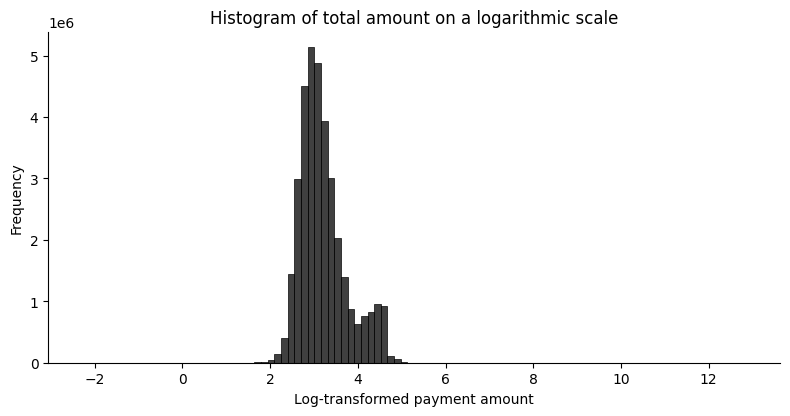

In [ ]:
# Histogram of payment amount on a logarithmic scale

plt.figure(figsize = (15,5))
sns.displot(np.log(full_df['total_amount'].values+1),bins = 100, aspect = 2, height = 4, color= "black")
plt.title("Histogram of total amount on a logarithmic scale")
plt.xlabel("Log-transformed payment amount")
plt.ylabel("Frequency")
plt.show()

Similar to 'trip_distance', the 'total_amount' attribute exhibits a highly right-skewed distribution. Consequently, we employ the same percentile methodology as applied to trip distance for further analysis.

In [ ]:
for i in range(0,100,10):
    val_2 = full_df["total_amount"].values
    val_2 = np.sort(val_2,axis = None)
    print("{} percentile value is {}".format(i,val_2[int(len(val_2)*(float(i)/100))]))
print("100 percentile value is ",val_2[-1])

0 percentile value is -801.0
10 percentile value is 12.65
20 percentile value is 14.9
30 percentile value is 16.8
40 percentile value is 18.75
50 percentile value is 21.0
60 percentile value is 23.62
70 percentile value is 27.6
80 percentile value is 34.44
90 percentile value is 58.92
100 percentile value is  386987.63


In [ ]:
for i in range(90,100):
    val_2 = full_df["total_amount"].values
    val_2 = np.sort(val_2,axis = None)
    print("{} percentile value is {}".format(i,val_2[int(len(val_2)*(float(i)/100))]))
print("100 percentile value is ",val_2[-1])

90 percentile value is 58.92
91 percentile value is 63.42
92 percentile value is 67.84
93 percentile value is 72.53
94 percentile value is 77.29
95 percentile value is 81.91
96 percentile value is 87.0
97 percentile value is 92.3
98 percentile value is 97.91
99 percentile value is 101.94
100 percentile value is  386987.63


In [ ]:
for i in np.arange(0.0, 1.0, 0.1):
    val_2 = full_df["total_amount"].values
    val_2 = np.sort(val_2,axis = None)
    print("{} percentile value is {}".format(99+i,val_2[int(len(val_2)*(float(99+i)/100))]))
print("100 percentile value is ",val_2[-1])

99.0 percentile value is 101.94
99.1 percentile value is 102.69
99.2 percentile value is 103.34
99.3 percentile value is 104.41
99.4 percentile value is 104.88
99.5 percentile value is 106.94
99.6 percentile value is 109.85
99.7 percentile value is 116.34
99.8 percentile value is 124.98
99.9 percentile value is 136.94
100 percentile value is  386987.63


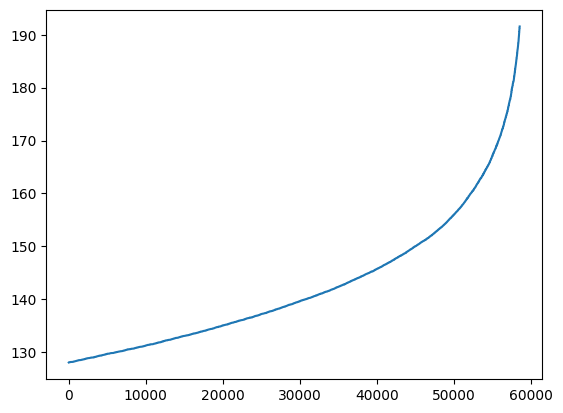

In [ ]:
plt.plot(val_2[-60000:-1500])
plt.show()



*   The 99.9th percentile of the total_amount was approximately 130, suggesting that nearly all transactions fell below this threshold.
*   Plots demonstrated a significant increase in values starting around $150, with only a minor proportion of transactions occuring beyond this point.


*   The cap of 160 allows for inclusion of slightly higher than usual fares, accommodating for longer trips or premium service charges while excluding extreme values that are not representative of typical transactions.
*   To implement this outlier removal, we adjusted our dataset to exclude any records where total_amount exceeded $160 or was less than or equal to zero, the latter to remove any potential data entry errors or refunds that were mistakenly included.





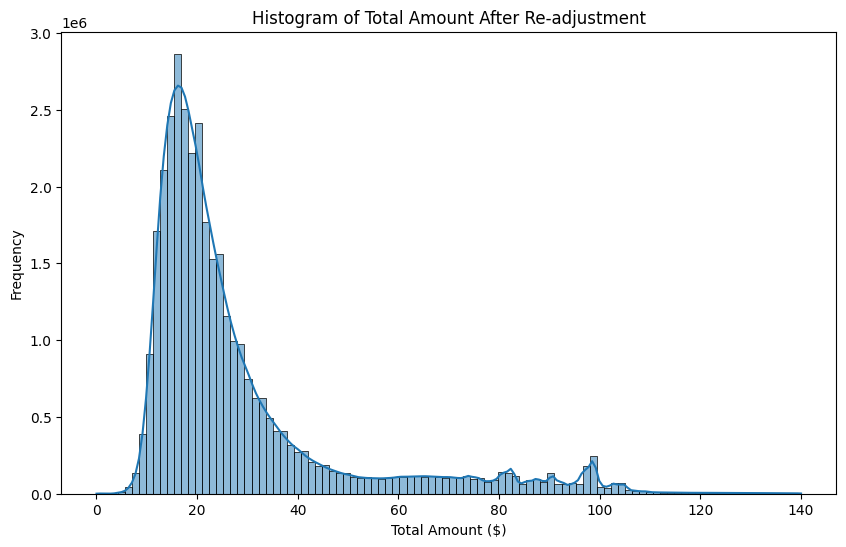

In [ ]:
# Adjusting the cutoff slightly if needed
adjusted_upper_bound = 140  # for example, adjusting to $160 if analysis supports it

# Apply the new cutoff
full_df = full_df[(full_df['total_amount'] > 0) & (full_df['total_amount'] <= adjusted_upper_bound)]

# Plot to verify the distribution after re-adjustment
plt.figure(figsize=(10, 6))
sns.histplot(full_df['total_amount'], bins=100, kde=True)
plt.title('Histogram of Total Amount After Re-adjustment')
plt.xlabel('Total Amount ($)')
plt.ylabel('Frequency')
plt.show()


Pickup Latitude and Pickup Longitude, Dropoff Latitude & Dropoff Longitude: New York is bounded by the location cordinates(lat,long) - (40.5774, -74.15) & (40.9176,-73.7004) so hence any cordinates not within these cordinates are not considered by us as we are only concerned with pickups which originate within New York.

In [ ]:
import folium

# Define the bounding box coordinates for New York City
SW_lat, SW_lon = 40.5774, -74.15
NE_lat, NE_lon = 40.9176, -73.7004

# Filtering pickup outliers
pickup_outliers = full_df[(full_df['pickup_longitude'] <= SW_lon) | (full_df['pickup_latitude'] <= SW_lat) |
                          (full_df['pickup_longitude'] >= NE_lon) | (full_df['pickup_latitude'] >= NE_lat)]

# Filtering dropoff outliers
dropoff_outliers = full_df[(full_df['dropoff_longitude'] <= SW_lon) | (full_df['dropoff_latitude'] <= SW_lat) |
                           (full_df['dropoff_longitude'] >= NE_lon) | (full_df['dropoff_latitude'] >= NE_lat)]


In [ ]:
import folium

# Create a map centered around New York City
base_location = [40.734695, -73.990372]
map_pickup_outliers = folium.Map(location=base_location, tiles='Stamen Toner', zoom_start=10)

# Add markers for pickup outliers
for idx, row in pickup_outliers.iterrows():
    folium.Marker([row['pickup_latitude'], row['pickup_longitude']],
                  popup='Pickup Outlier').add_to(map_pickup_outliers)

# Similarly, create and populate a map for dropoff outliers
map_dropoff_outliers = folium.Map(location=base_location, tiles='Stamen Toner', zoom_start=10)
for idx, row in dropoff_outliers.iterrows():
    folium.Marker([row['dropoff_latitude'], row['dropoff_longitude']],
                  popup='Dropoff Outlier').add_to(map_dropoff_outliers)

# Display the maps (in Jupyter, just calling the map object will render it)
map_pickup_outliers
map_dropoff_outliers


Trip duration

In [ ]:
35826232


In [ ]:
def add_trip_details_to_df(df):
    # Convert pickup and dropoff times to UNIX timestamps
    pickup_unix = [convert_to_unix(x) for x in df['tpep_pickup_datetime']]
    dropoff_unix = [convert_to_unix(x) for x in df['tpep_dropoff_datetime']]

    # Calculate the duration of trips in minutes
    df['trip_times'] = (np.array(dropoff_unix) - np.array(pickup_unix)) / 60.0

    # Add pickup times in UNIX format to the DataFrame
    df['pickup_times'] = pickup_unix

    # Calculate speed in miles per hour
    df['Speed'] = 60 * (df['trip_distance'] / df['trip_times'])

    return df


In [ ]:
# Convert to datetime format if not already done
full_df['tpep_pickup_datetime'] = pd.to_datetime(full_df['tpep_pickup_datetime'], errors='coerce')
full_df['tpep_dropoff_datetime'] = pd.to_datetime(full_df['tpep_dropoff_datetime'], errors='coerce')

# Now apply the function to enhance full_df with additional details
add_trip_details_to_df(full_df)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,total_amount,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_times,pickup_times,Speed
0,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,161,141,9.3,14.30,40.758028,-73.977698,40.766948,-73.959635,8.433333,1.672533e+09,6.901186
1,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,43,237,7.9,16.90,40.782477,-73.965555,40.768615,-73.965635,6.316667,1.672535e+09,10.448549
2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,48,238,14.9,34.90,40.762253,-73.989845,40.791705,-73.973049,12.750000,1.672533e+09,11.811765
4,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,107,79,11.4,19.68,40.736824,-73.984052,40.727620,-73.985937,10.833333,1.672532e+09,7.920000
5,2023-01-01 00:50:34,2023-01-01 01:02:52,1.0,1.84,161,137,12.8,27.80,40.758028,-73.977698,40.740439,-73.976495,12.300000,1.672534e+09,8.975610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37013668,2023-12-31 23:03:46,2023-12-31 23:21:54,1.0,2.60,170,236,17.0,26.40,40.747746,-73.978492,40.780436,-73.957012,18.133333,1.704064e+09,8.602941
37013669,2023-12-31 23:23:34,2023-12-31 23:26:17,1.0,0.60,236,237,5.1,12.12,40.780436,-73.957012,40.768615,-73.965635,2.716667,1.704065e+09,13.251534
37013670,2023-12-31 23:34:58,2023-12-31 23:53:01,1.0,3.80,161,7,19.8,29.75,40.758028,-73.977698,40.761493,-73.919694,18.050000,1.704066e+09,12.631579
37013671,2023-12-31 23:12:45,2023-12-31 23:23:15,2.0,3.10,79,141,14.9,23.85,40.727620,-73.985937,40.766948,-73.959635,10.500000,1.704064e+09,17.714286


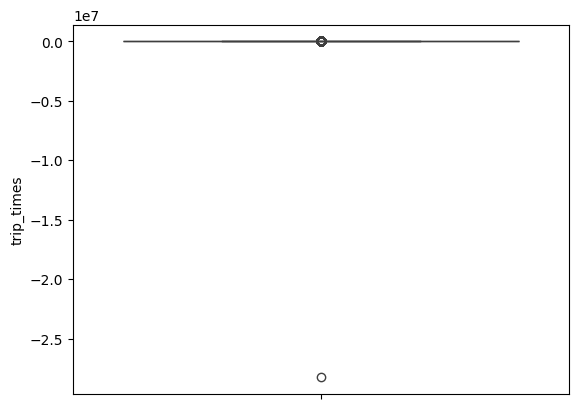

0 percentile value is -28248298.466666665
10 percentile value is 4.883333333333334
20 percentile value is 6.8
30 percentile value is 8.6
40 percentile value is 10.483333333333333
50 percentile value is 12.6
60 percentile value is 15.116666666666667
70 percentile value is 18.383333333333333
80 percentile value is 23.133333333333333
90 percentile value is 32.15
100 percentile value is 7053.616666666667
90 percentile value is 32.15
91 percentile value is 33.666666666666664
92 percentile value is 35.38333333333333
93 percentile value is 37.38333333333333
94 percentile value is 39.71666666666667
95 percentile value is 42.55
96 percentile value is 46.016666666666666
97 percentile value is 50.45
98 percentile value is 56.56666666666667
99 percentile value is 66.65
100 percentile value is 7053.616666666667


In [ ]:
# Visualize outliers in trip times
sns.boxplot(y="trip_times", data=full_df)
plt.show()

# Calculate and print percentile values for trip durations
percentiles = np.percentile(full_df['trip_times'].dropna(), range(0, 101, 10))
for idx, value in enumerate(percentiles):
    print(f"{idx*10} percentile value is {value}")

# Looking more closely at the upper percentiles
upper_percentiles = np.percentile(full_df['trip_times'].dropna(), range(90, 101))
for idx, value in enumerate(upper_percentiles, start=90):
    print(f"{idx} percentile value is {value}")


In [ ]:
for i in range(90,100):
    val_2 = full_df["trip_times"].values
    val_2 = np.sort(val_2,axis = None)
    print("{} percentile value is {}".format(i,val_2[int(len(val_2)*(float(i)/100))]))
print("100 percentile value is ",val_2[-1])

90 percentile value is 32.15
91 percentile value is 33.666666666666664
92 percentile value is 35.38333333333333
93 percentile value is 37.38333333333333
94 percentile value is 39.71666666666667
95 percentile value is 42.55
96 percentile value is 46.016666666666666
97 percentile value is 50.45
98 percentile value is 56.56666666666667
99 percentile value is 66.65
100 percentile value is  7053.616666666667


In [ ]:
for i in np.arange(0.0, 1.0, 0.1):
    val_2 = full_df["trip_times"].values
    val_2 = np.sort(val_2,axis = None)
    print("{} percentile value is {}".format(90+i,val_2[int(len(val_2)*(float(99+i)/100))]))
print("100 percentile value is ",val_2[-1])

90.0 percentile value is 66.65
90.1 percentile value is 68.16666666666667
90.2 percentile value is 69.85
90.3 percentile value is 71.78333333333333
90.4 percentile value is 74.0
90.5 percentile value is 76.66666666666667
90.6 percentile value is 80.03333333333333
90.7 percentile value is 84.71666666666667
90.8 percentile value is 92.56666666666666
90.9 percentile value is 136.2
100 percentile value is  7053.616666666667


In [ ]:
# Reapply the filter to remove trips that exceed 720 minutes
clean_df = full_df[(full_df['trip_times'] > 0) & (full_df['trip_times'] <= 720)]

# Confirm removal
remaining_outliers = clean_df[clean_df['trip_times'] > 720]
print("Remaining trips exceeding 720 minutes after re-filtering:", remaining_outliers.shape[0])


Remaining trips exceeding 720 minutes after re-filtering: 0


In [ ]:
# Check data type of 'trip_times'
print("Data type of trip_times:", full_df['trip_times'].dtype)


Data type of trip_times: float64


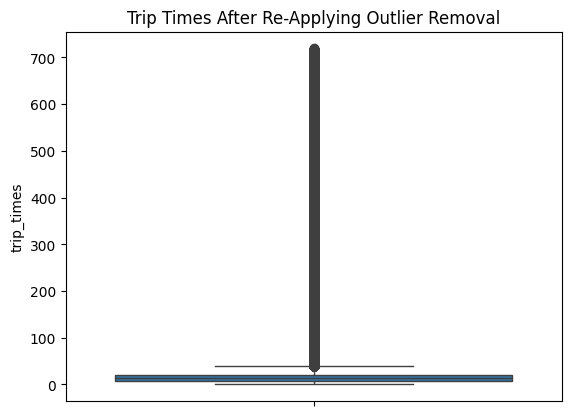

In [ ]:
# Visualize the filtered data
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y="trip_times", data=clean_df)
plt.title("Trip Times After Re-Applying Outlier Removal")
plt.show()


In [ ]:
# Check for any entries in the dataset that exceed the 720-minute limit
outliers_over_720 = clean_df[clean_df['trip_times'] > 720]

# Display the number of such outliers
print("Number of trips exceeding 720 minutes:", outliers_over_720.shape[0])

# Optionally, display some of the outlier data for inspection
if not outliers_over_720.empty:
    print(outliers_over_720[['trip_times', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance']])


Number of trips exceeding 720 minutes: 0


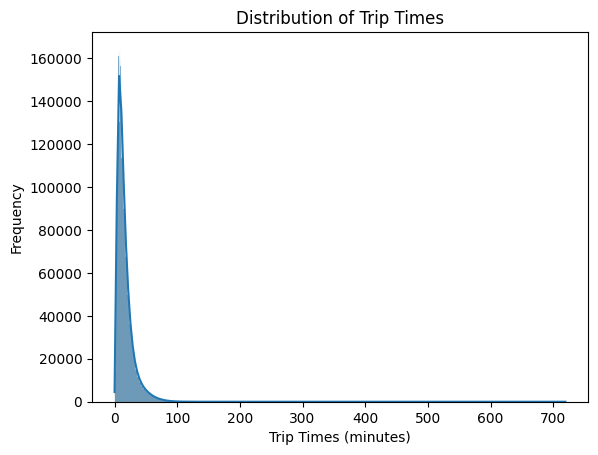

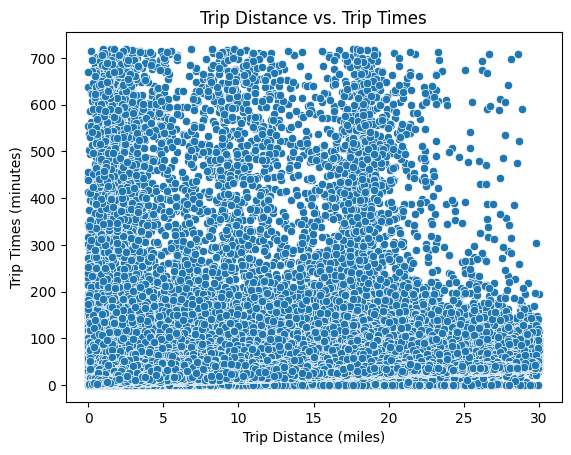

In [ ]:
sns.histplot(clean_df['trip_times'], kde=True)
plt.title('Distribution of Trip Times')
plt.xlabel('Trip Times (minutes)')
plt.ylabel('Frequency')
plt.show()

sns.scatterplot(x='trip_distance', y='trip_times', data=clean_df)
plt.title('Trip Distance vs. Trip Times')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Trip Times (minutes)')
plt.show()


In [ ]:
clean_df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,total_amount,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_times,pickup_times,Speed
0,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,161,141,9.3,14.30,40.758028,-73.977698,40.766948,-73.959635,8.433333,1.672533e+09,6.901186
1,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,43,237,7.9,16.90,40.782477,-73.965555,40.768615,-73.965635,6.316667,1.672535e+09,10.448549
2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,48,238,14.9,34.90,40.762253,-73.989845,40.791705,-73.973049,12.750000,1.672533e+09,11.811765
4,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,107,79,11.4,19.68,40.736824,-73.984052,40.727620,-73.985937,10.833333,1.672532e+09,7.920000
5,2023-01-01 00:50:34,2023-01-01 01:02:52,1.0,1.84,161,137,12.8,27.80,40.758028,-73.977698,40.740439,-73.976495,12.300000,1.672534e+09,8.975610


Speed: The avg speed in Newyork speed is 12.45miles/hr, so a cab driver can travel 2 miles per 10min on avg.

<ipython-input-64-59ee88b3adf5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Speed'] = 60 * (clean_df['trip_distance'] / clean_df['trip_times'])


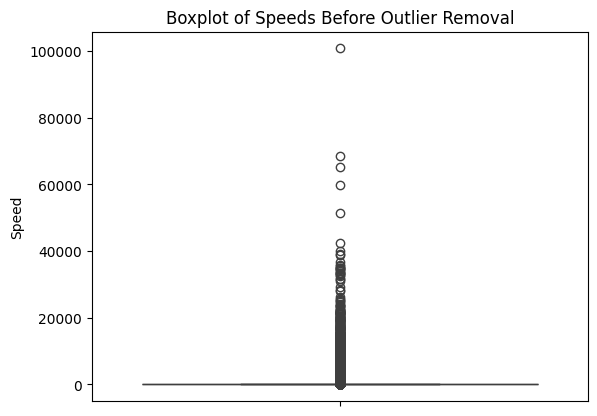

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate speed in miles per hour
clean_df['Speed'] = 60 * (clean_df['trip_distance'] / clean_df['trip_times'])

# Display boxplot of speeds to visualize potential outliers
sns.boxplot(y="Speed", data=clean_df)
plt.title("Boxplot of Speeds Before Outlier Removal")
plt.show()


In [ ]:
# Calculating speed values at each percentile from 0 to 100
percentiles = np.percentile(clean_df['Speed'].dropna(), range(101))  # Including the 100th percentile
for i, value in enumerate(percentiles):
    print(f"{i} percentile value is {value}")


0 percentile value is 0.0009389671361502347
1 percentile value is 2.7147540983606553
2 percentile value is 3.3333333333333335
3 percentile value is 3.745664739884393
4 percentile value is 4.066683529749931
5 percentile value is 4.337349397590361
6 percentile value is 4.572846770102699
7 percentile value is 4.784850908144987
8 percentile value is 4.978233034571063
9 percentile value is 5.155855096882897
10 percentile value is 5.322677322677323
11 percentile value is 5.480093676814988
12 percentile value is 5.629090909090909
13 percentile value is 5.771543086172345
14 percentile value is 5.907692307692308
15 percentile value is 6.038286235186873
16 percentile value is 6.165354330708661
17 percentile value is 6.288209606986899
18 percentile value is 6.407766990291263
19 percentile value is 6.523887973640857
20 percentile value is 6.636871508379889
21 percentile value is 6.7483319434837385
22 percentile value is 6.857142857142857
23 percentile value is 6.963249516441006
24 percentile value

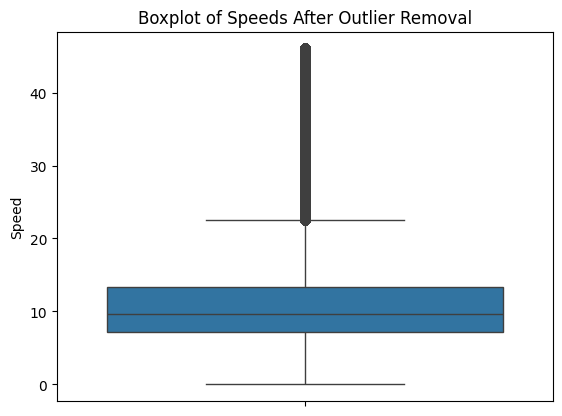

In [ ]:
# Calculate the 99.9th percentile
percentile_99_9 = np.percentile(clean_df['Speed'].dropna(), 99.9)

# Removing speed outliers above the 99.9th percentile
clean_df = clean_df[(clean_df['Speed'] > 0) & (clean_df['Speed'] < percentile_99_9)]

# Replot to confirm the removal of outliers
sns.boxplot(y="Speed", data=clean_df)
plt.title("Boxplot of Speeds After Outlier Removal")
plt.show()


In [ ]:
# Calculate the average speed
average_speed = clean_df['Speed'].mean()
print(f"Average speed of cabs in New York after cleaning: {average_speed:.2f} miles per hour")


Average speed of cabs in New York after cleaning: 11.26 miles per hour


The majority of the speeds are now concentrated between approximately 10 and 20 miles per hour, which is consistent with urban driving conditions in New York City, where traffic congestion often slows down vehicle speeds.

# The data is filtered to ensure that both pickup and dropoff times fall within the 2023 calendar year.

In [ ]:
import pandas as pd

# Ensure that datetime columns are in the correct datetime format
clean_df['tpep_pickup_datetime'] = pd.to_datetime(clean_df['tpep_pickup_datetime'], errors='coerce')
clean_df['tpep_dropoff_datetime'] = pd.to_datetime(clean_df['tpep_dropoff_datetime'], errors='coerce')

# Define the start and end date for the year 2023
start_date = '2023-01-01'
end_date = '2023-12-31'

# Filter the data to include only entries within these dates
filtered_data_2023 = clean_df[
    (clean_df['tpep_pickup_datetime'] >= start_date) &
    (clean_df['tpep_pickup_datetime'] <= end_date) &
    (clean_df['tpep_dropoff_datetime'] >= start_date) &
    (clean_df['tpep_dropoff_datetime'] <= end_date)
]

# Print the number of entries after filtering
print("Number of entries for the year 2023: ", filtered_data_2023.shape[0])


Number of entries for the year 2023:  34921417


# EDA

In [ ]:
import pandas as pd

# Convert pickup datetime to datetime format if necessary
filtered_data_2023['tpep_pickup_datetime'] = pd.to_datetime(filtered_data_2023['tpep_pickup_datetime'], errors='coerce')

# Extract the pickup month from the datetime column
filtered_data_2023['PU_month'] = filtered_data_2023['tpep_pickup_datetime'].dt.month.astype(np.uint8)

# Extract the pickup day of the month from the datetime column
filtered_data_2023['PU_day_of_month'] = filtered_data_2023['tpep_pickup_datetime'].dt.day.astype(np.uint8)

# Extract the pickup day of the week (0-6) from the datetime column
filtered_data_2023['PU_day_of_week'] = filtered_data_2023['tpep_pickup_datetime'].dt.weekday.astype(np.uint8)

# Extract the pickup hour from the datetime column
filtered_data_2023['PU_hour'] = filtered_data_2023['tpep_pickup_datetime'].dt.hour.astype(np.uint8)

# Definition of a list of day of the week names
PU_day_of_week_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Definition of a list of month names, adjust according to your data range
PU_month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


<ipython-input-69-00fd3c211736>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_2023['tpep_pickup_datetime'] = pd.to_datetime(filtered_data_2023['tpep_pickup_datetime'], errors='coerce')
<ipython-input-69-00fd3c211736>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_2023['PU_month'] = filtered_data_2023['tpep_pickup_datetime'].dt.month.astype(np.uint8)
<ipython-input-69-00fd3c211736>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

 4 time zones are created representing the time of the day:

Morning 6:00 am - 11:59 pm

Afternoon 12:00 pm - 3:59 pm

Evening 4:00 pm - 9:59 pm

Late Night 10:00 pm - 5:59 am

In [ ]:
def time_of_day(x):
    if 6 <= x < 12:
        return 'Morning'
    elif 12 <= x < 16:
        return 'Afternoon'
    elif 16 <= x < 22:
        return 'Evening'
    else:
        return 'Late Night'


In [ ]:
# Apply the time_of_day function to the 'PU_hour' column in clean_df
filtered_data_2023['PU_time_of_day'] = filtered_data_2023['PU_hour'].apply(time_of_day)


<ipython-input-71-2bfe4c37263e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_2023['PU_time_of_day'] = filtered_data_2023['PU_hour'].apply(time_of_day)


Daily distribution of taxi demand

In [ ]:
# Create a helper dataframe that displays the number of trips aggregated per date
date = filtered_data_2023['tpep_pickup_datetime'].dt.date
taxi_group_date = date.groupby(date).agg('count').reset_index(name = 'count')
taxi_group_date.columns = ['Date', 'Number_of_Pickups']

# Set the date as index
taxi_group_date_idx = taxi_group_date.set_index('Date')
print(taxi_group_date_idx.head())

            Number_of_Pickups
Date                         
2023-01-01              67859
2023-01-02              60027
2023-01-03              78703
2023-01-04              87686
2023-01-05              93217


In [ ]:
taxi_group_date_idx.head(20)

,Number_of_Pickups
Date,
2023-01-01,67859
2023-01-02,60027
2023-01-03,78703
2023-01-04,87686
2023-01-05,93217
2023-01-06,94831
2023-01-07,97353
2023-01-08,78269
2023-01-09,78467


In [ ]:
# Ensure the date column exists and is in the right format
filtered_data_2023['Date'] = filtered_data_2023['tpep_pickup_datetime'].dt.date
# Merge the trip count data back into the main DataFrame
filtered_data_2023 = filtered_data_2023.merge(taxi_group_date_idx, on='Date', how='left')
# Check the first few rows to confirm the merge worked as expected
print(filtered_data_2023.head())


<ipython-input-75-a1ce45b62f5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_2023['Date'] = filtered_data_2023['tpep_pickup_datetime'].dt.date


  tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0           0.97   
1  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0           1.10   
2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0           2.51   
3  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0           1.43   
4  2023-01-01 00:50:34   2023-01-01 01:02:52              1.0           1.84   

   PULocationID  DOLocationID  fare_amount  total_amount  pickup_latitude  \
0           161           141          9.3         14.30        40.758028   
1            43           237          7.9         16.90        40.782477   
2            48           238         14.9         34.90        40.762253   
3           107            79         11.4         19.68        40.736824   
4           161           137         12.8         27.80        40.758028   

   pickup_longitude  ...  trip_times  pickup_times      

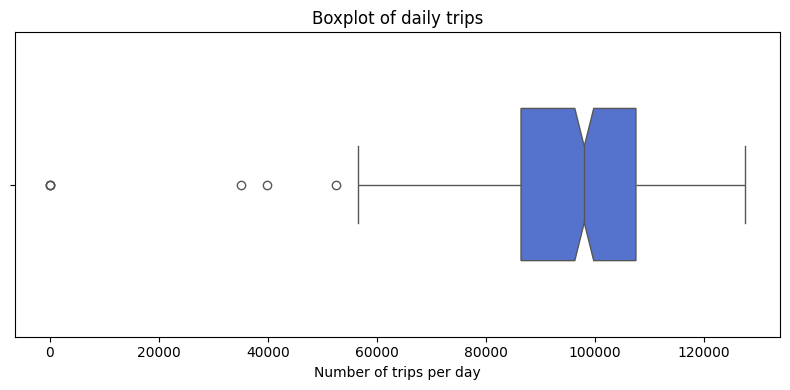

In [ ]:
# Boxplot of daily number of trips

fig, ax = plt.subplots(figsize = (8,4))
# Create the boxplot
ax = sns.boxplot(taxi_group_date_idx, x='Number_of_Pickups', color = 'royalblue', orient='h', width = .5, notch = True)
# Set the title and label
ax.set(xlabel= 'Number of trips per day',title= "Boxplot of daily trips")

plt.tight_layout()
plt.show()

<ipython-input-77-3594ef458c24>:18: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(x, y, linestyle='-', marker='', color='black', linewidth=1.5)


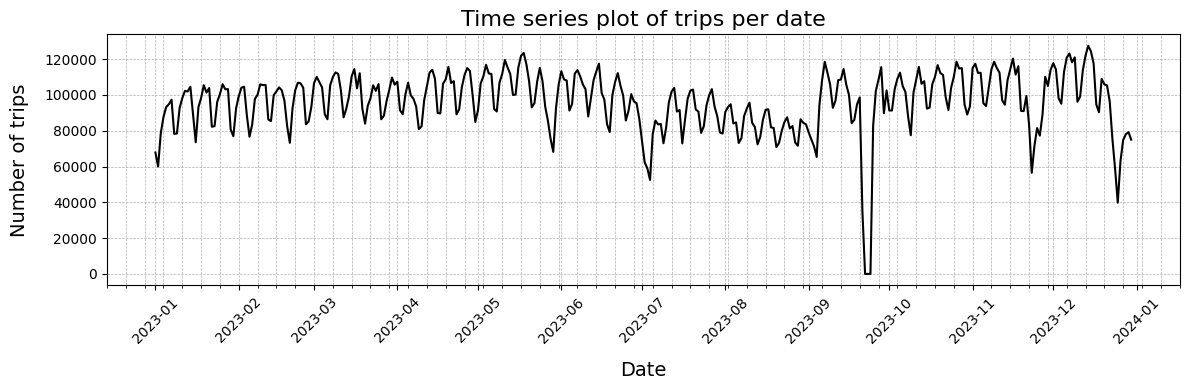

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


filtered_data_2023['tpep_pickup_datetime'] = pd.to_datetime(filtered_data_2023['tpep_pickup_datetime'], errors='coerce')

filtered_data_2023['Date'] = filtered_data_2023['tpep_pickup_datetime'].dt.date

taxi_group_date = filtered_data_2023.groupby('Date').size().reset_index(name='Number_of_Pickups')


plt.figure(figsize=(12, 4), dpi=100)

x = pd.to_datetime(taxi_group_date['Date'])
y = taxi_group_date['Number_of_Pickups']

plt.plot_date(x, y, linestyle='-', marker='', color='black', linewidth=1.5)

plt.title("Time series plot of trips per date", fontsize=16)
plt.xlabel("Date", fontsize=14, labelpad=11)
plt.ylabel("Number of trips", fontsize=14, labelpad=11)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_minor_locator(mdates.DayLocator(interval=7))

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.savefig('Timeplot_trips_per_date.png', dpi=300, bbox_inches='tight')  # Save the plot
plt.show()


<ipython-input-99-8f17e2ba24b5>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='Month', y='Number_of_Trips', data=monthly_trips, palette='deep')
<ipython-input-99-8f17e2ba24b5>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(month_labels[:monthly_trips['Month'].max()])  # Adjust based on your actual data


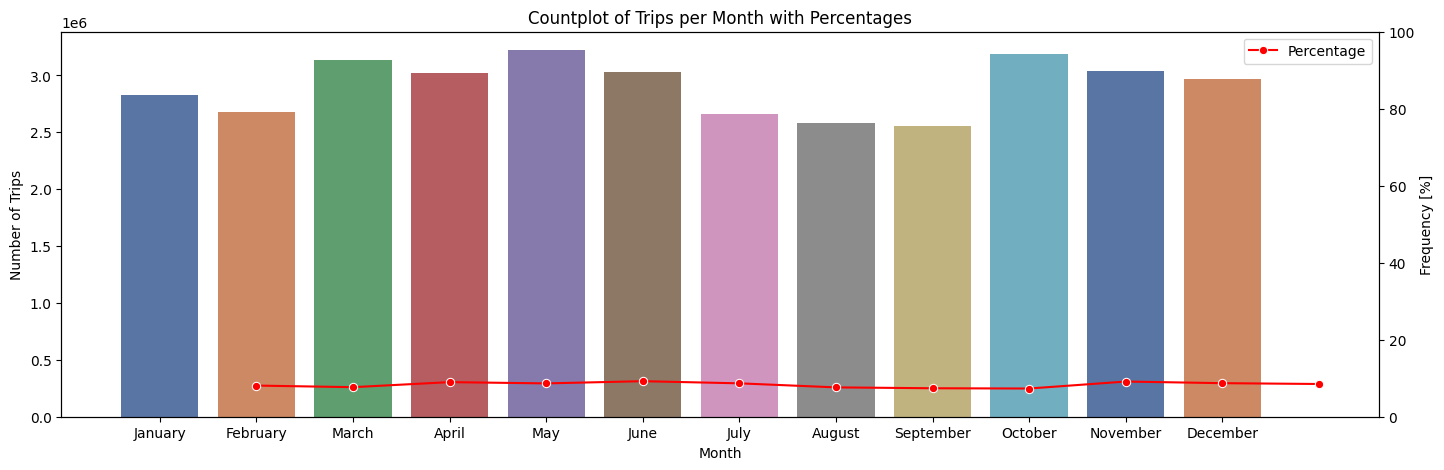

In [ ]:

import matplotlib.ticker as ticker
# Assume 'filtered_data_2023' has a 'tpep_pickup_datetime' column
filtered_data_2023['Month'] = filtered_data_2023['tpep_pickup_datetime'].dt.month
monthly_trips = filtered_data_2023.groupby('Month').size().reset_index(name='Number_of_Trips')

# Calculate total trips for percentage calculation
total_trips = monthly_trips['Number_of_Trips'].sum()

# Calculate the percentage of trips each month
monthly_trips['Percentage'] = (monthly_trips['Number_of_Trips'] / total_trips) * 100



# Set up the matplotlib figure
plt.figure(figsize=(17, 5))

# Create a bar plot for the trip counts
ax1 = sns.barplot(x='Month', y='Number_of_Trips', data=monthly_trips, palette='deep')
ax1.set_title('Countplot of Trips per Month with Percentages')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Trips')

# Change Month labels to names (ensure the month numbers in your data are 1-indexed)
month_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax1.set_xticklabels(month_labels[:monthly_trips['Month'].max()])  # Adjust based on your actual data

# Create a second y-axis for percentages
ax2 = ax1.twinx()
ax2.set_ylabel('Frequency [%]')
ax2.set_ylim(0, 100)  # Set the limit for the percentage axis to 100%

# Plot the percentages
sns.lineplot(x='Month', y='Percentage', data=monthly_trips, sort=False, ax=ax2, color='red', marker='o', label='Percentage')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


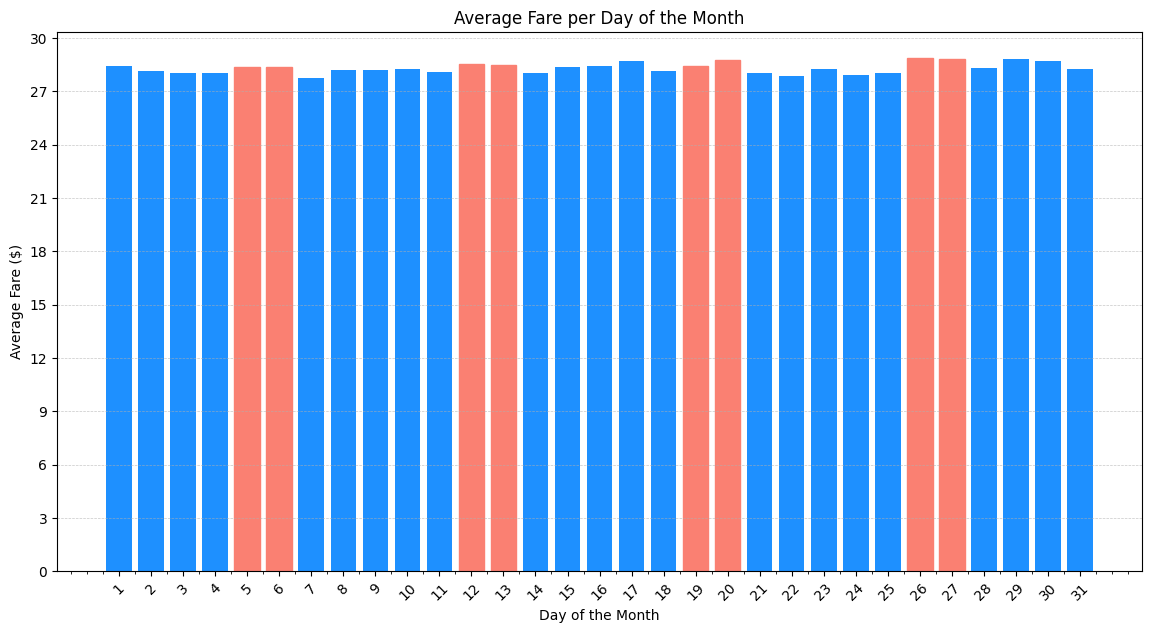

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Group by the day of the month to calculate the average total amount per day
avg_daily_fare = filtered_data_2023.groupby('PU_day_of_month')['total_amount'].mean().reset_index(name='average_fare')

plt.figure(figsize=(14, 7))
bars = plt.bar(avg_daily_fare['PU_day_of_month'], avg_daily_fare['average_fare'], color='dodgerblue')

# Highlight weekends in a different color
weekends = [5, 6, 12, 13, 19, 20, 26, 27]  # Assuming these are the days of weekends
for i in weekends:
    bars[i-1].set_color('salmon')  # Adjust color for weekends

plt.title('Average Fare per Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Average Fare ($)')
plt.xticks(range(1, 32))  # Ensure all days are labeled from 1 to 31

# Set y-axis ticks at specific intervals
plt.yticks(range(0, int(max(avg_daily_fare['average_fare']) + 3), 3))

# Add minor ticks on the x-axis at each day
ax = plt.gca()
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))  # Subdivide the intervals for better precision

# Add gridlines
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Rotate x labels for better readability
plt.xticks(rotation=45)

plt.show()


This bar chart that shows the number of trips per hour. This type of visualization will help identify peak hours for taxi activity, which can be insightful for understanding demand patterns.

<ipython-input-82-275ef54db1b9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PU_hour', y='Number_of_Trips', data=hourly_trips, palette='coolwarm')


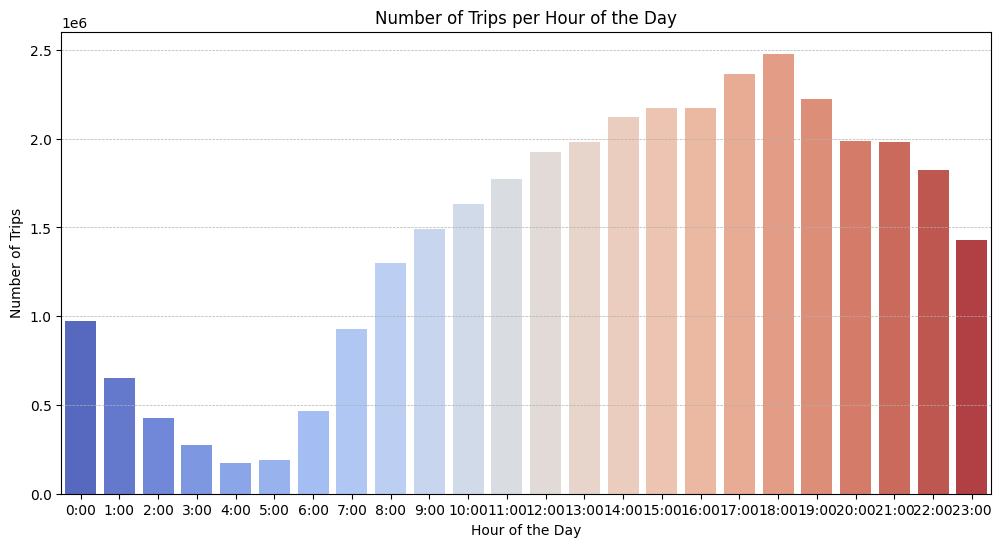

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'PU_hour' is already in your dataframe and correctly populated
hourly_trips = filtered_data_2023.groupby('PU_hour').size().reset_index(name='Number_of_Trips')
plt.figure(figsize=(12, 6))
sns.barplot(x='PU_hour', y='Number_of_Trips', data=hourly_trips, palette='coolwarm')
plt.title('Number of Trips per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24), [f"{hour}:00" for hour in range(0, 24)])  # Labeling each hour for clarity
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.show()




The plot illustrates a typical urban daily rhythm, with taxi trips peaking during the morning and evening rush hours, showing highest demand around 6:00 PM, and tapering off sharply after midnight until the early morning hours.

**Visualizing the locations with the highest demand for taxis around 6 PM using a geoplot**

In [ ]:
import geopandas as gpd

# Load the shapefile
taxi_zones = gpd.read_file('/content/drive/MyDrive/taxi_zones/taxi_zones.dbf')

# Check the data
print(taxi_zones.head())


   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.770 256767.698, 1026495.593 ...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.310 144283.336, 936046.565 14...  


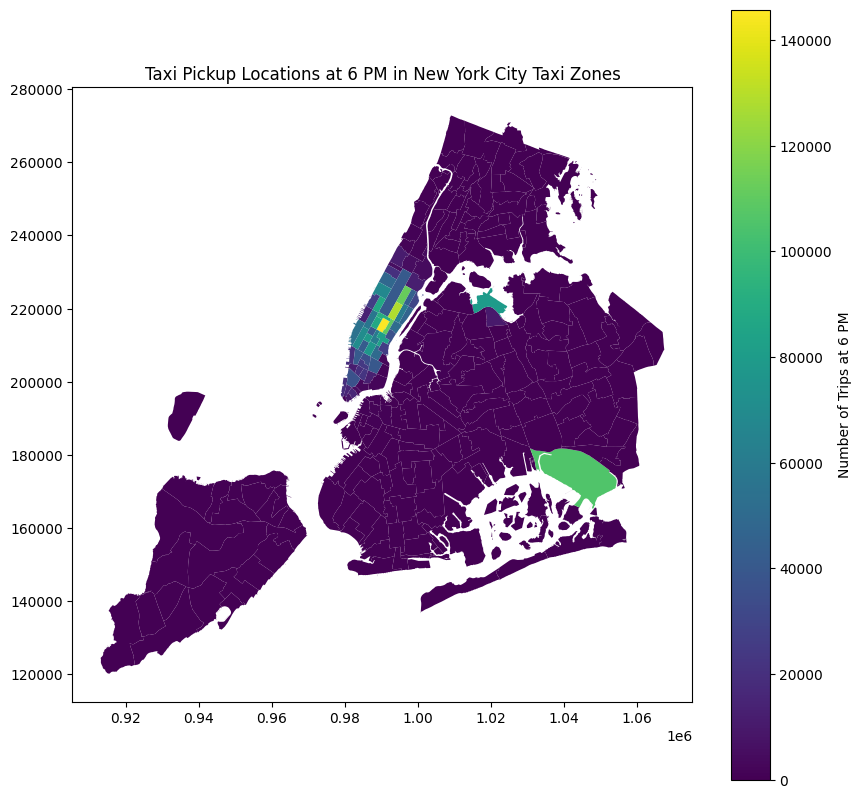

In [ ]:
# Filter the taxi trips data for 6 PM pickups
six_pm_trips = filtered_data_2023[filtered_data_2023['PU_hour'] == 18]

# Merge the trip data with the taxi zones geospatial data
six_pm_trips_geo = six_pm_trips.merge(taxi_zones, left_on='PULocationID', right_on='LocationID', how='left')

# Convert to GeoDataFrame
six_pm_trips_geo = gpd.GeoDataFrame(six_pm_trips_geo, geometry='geometry', crs=taxi_zones.crs)


# Aggregate trip data by LocationID to count trips per zone
trip_counts = six_pm_trips_geo.groupby('LocationID').size().reset_index(name='trip_counts')

# Merge trip counts back onto the taxi zones geodataframe
taxi_zones = taxi_zones.merge(trip_counts, on='LocationID', how='left').fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
taxi_zones.plot(column='trip_counts', ax=ax, legend=True,
                legend_kwds={'label': "Number of Trips at 6 PM"},
                cmap='viridis')  # Choose a colormap that fits the data well
plt.title('Taxi Pickup Locations at 6 PM in New York City Taxi Zones')
plt.show()


In [ ]:
filtered_data_2023.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,total_amount,pickup_latitude,pickup_longitude,...,pickup_times,Speed,PU_month,PU_day_of_month,PU_day_of_week,PU_hour,PU_time_of_day,Date,Number_of_Pickups,Month
0,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,161,141,9.3,14.30,40.758028,-73.977698,...,1.672533e+09,6.901186,1,1,6,0,Late Night,2023-01-01,67859,1
1,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,43,237,7.9,16.90,40.782477,-73.965555,...,1.672535e+09,10.448549,1,1,6,0,Late Night,2023-01-01,67859,1
2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,48,238,14.9,34.90,40.762253,-73.989845,...,1.672533e+09,11.811765,1,1,6,0,Late Night,2023-01-01,67859,1
3,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,107,79,11.4,19.68,40.736824,-73.984052,...,1.672532e+09,7.920000,1,1,6,0,Late Night,2023-01-01,67859,1
4,2023-01-01 00:50:34,2023-01-01 01:02:52,1.0,1.84,161,137,12.8,27.80,40.758028,-73.977698,...,1.672534e+09,8.975610,1,1,6,0,Late Night,2023-01-01,67859,1


In [ ]:
filtered_data_2023.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'PULocationID', 'DOLocationID', 'fare_amount',
       'total_amount', 'pickup_latitude', 'pickup_longitude',
       'dropoff_latitude', 'dropoff_longitude', 'trip_times', 'pickup_times',
       'Speed', 'PU_month', 'PU_day_of_month', 'PU_day_of_week', 'PU_hour',
       'PU_time_of_day', 'Date', 'Number_of_Pickups', 'Month'],
      dtype='object')

In [ ]:
# Assuming 'Month' is already in both dataframes and formatted correctly
print(filtered_data_2023.columns)  # Verify 'Month' is present and correctly typed
print(monthly_trips.columns)       # Should have 'Month' and 'Number_of_Trips'


Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'PULocationID', 'DOLocationID', 'fare_amount',
       'total_amount', 'pickup_latitude', 'pickup_longitude',
       'dropoff_latitude', 'dropoff_longitude', 'trip_times', 'pickup_times',
       'Speed', 'PU_month', 'PU_day_of_month', 'PU_day_of_week', 'PU_hour',
       'PU_time_of_day', 'Date', 'Number_of_Pickups', 'Month'],
      dtype='object')
Index(['Month', 'Number_of_Trips', 'Percentage'], dtype='object')


In [ ]:
monthly_trips.head(31)

,Month,Number_of_Trips,Percentage
0,1,2825217,8.090213
1,2,2679973,7.674296
2,3,3137751,8.985177
3,4,3022665,8.655620
4,5,3223271,9.230069
5,6,3028629,8.672698
6,7,2661570,7.621598
7,8,2581716,7.392930
8,9,2558131,7.325393
9,10,3190571,9.136431


In [ ]:
# Merge the 'Number_of_Trips' into 'filtered_data_2023' using the 'Month' as the key
filtered_data_2023 = filtered_data_2023.merge(monthly_trips[['Month', 'Number_of_Trips']], on='Month', how='left')


In [ ]:
print(filtered_data_2023.head())

  tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0           0.97   
1  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0           1.10   
2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0           2.51   
3  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0           1.43   
4  2023-01-01 00:50:34   2023-01-01 01:02:52              1.0           1.84   

   PULocationID  DOLocationID  fare_amount  total_amount  pickup_latitude  \
0           161           141          9.3         14.30        40.758028   
1            43           237          7.9         16.90        40.782477   
2            48           238         14.9         34.90        40.762253   
3           107            79         11.4         19.68        40.736824   
4           161           137         12.8         27.80        40.758028   

   pickup_longitude  ...      Speed  PU_month  PU_day_of

In [ ]:
# Assuming 'filtered_data_2023' originally contains a 'Month' column calculated correctly
monthly_trips_check = filtered_data_2023.groupby('Month').size().reset_index(name='Correct_Number_of_Trips')
print(monthly_trips_check)


    Month  Correct_Number_of_Trips
0       1                  2825217
1       2                  2679973
2       3                  3137751
3       4                  3022665
4       5                  3223271
5       6                  3028629
6       7                  2661570
7       8                  2581716
8       9                  2558131
9      10                  3190571
10     11                  3043293
11     12                  2968630


In [ ]:
print(filtered_data_2023['Month'].unique())
print(monthly_trips['Month'].unique())
# Check for duplicates in the main data that could have skewed the merge
print(filtered_data_2023.duplicated(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance']).sum())


[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
11459


In [ ]:
# Re-calculate the total number of trips per month
monthly_trips_corrected = filtered_data_2023.groupby('Month').size().reset_index(name='Number_of_Trips')
print(monthly_trips_corrected)


    Month  Number_of_Trips
0       1          2825217
1       2          2679973
2       3          3137751
3       4          3022665
4       5          3223271
5       6          3028629
6       7          2661570
7       8          2581716
8       9          2558131
9      10          3190571
10     11          3043293
11     12          2968630


In [ ]:
# Merge the corrected number of trips back into the main DataFrame
filtered_data_2023 = filtered_data_2023.drop(columns=['Number_of_Trips'], errors='ignore')  # Remove the old column if it exists
filtered_data_2023 = filtered_data_2023.merge(monthly_trips_corrected, on='Month', how='left')


In [ ]:
# Check the first few rows to ensure the merge has worked as expected
print(filtered_data_2023.head())


  tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0           0.97   
1  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0           1.10   
2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0           2.51   
3  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0           1.43   
4  2023-01-01 00:50:34   2023-01-01 01:02:52              1.0           1.84   

   PULocationID  DOLocationID  fare_amount  total_amount  pickup_latitude  \
0           161           141          9.3         14.30        40.758028   
1            43           237          7.9         16.90        40.782477   
2            48           238         14.9         34.90        40.762253   
3           107            79         11.4         19.68        40.736824   
4           161           137         12.8         27.80        40.758028   

   pickup_longitude  ...      Speed  PU_month  PU_day_of

In [ ]:
filtered_data_2023.to_parquet('/content/drive/MyDrive/Filtered_Dataset/filtered_data_2023.parquet')